<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/linearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

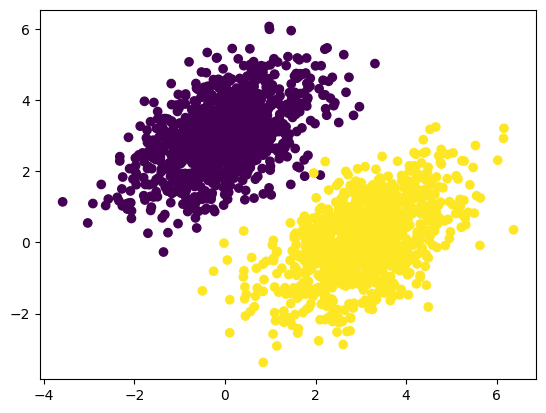

In [4]:
import matplotlib.pyplot as plt
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5,1 ]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))


plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [11]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

def model(inputs):
  return tf.matmul(inputs, W) + b


def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [12]:
for step in range(40):
  loss = training_step(inputs,targets)
  print(f"Loss at step: {step}: {loss:.4f}")

Loss at step: 0: 2.5074
Loss at step: 1: 0.4315
Loss at step: 2: 0.1655
Loss at step: 3: 0.1193
Loss at step: 4: 0.1060
Loss at step: 5: 0.0980
Loss at step: 6: 0.0913
Loss at step: 7: 0.0854
Loss at step: 8: 0.0799
Loss at step: 9: 0.0750
Loss at step: 10: 0.0705
Loss at step: 11: 0.0664
Loss at step: 12: 0.0626
Loss at step: 13: 0.0592
Loss at step: 14: 0.0561
Loss at step: 15: 0.0532
Loss at step: 16: 0.0507
Loss at step: 17: 0.0483
Loss at step: 18: 0.0462
Loss at step: 19: 0.0442
Loss at step: 20: 0.0424
Loss at step: 21: 0.0408
Loss at step: 22: 0.0393
Loss at step: 23: 0.0380
Loss at step: 24: 0.0367
Loss at step: 25: 0.0356
Loss at step: 26: 0.0346
Loss at step: 27: 0.0336
Loss at step: 28: 0.0328
Loss at step: 29: 0.0320
Loss at step: 30: 0.0313
Loss at step: 31: 0.0307
Loss at step: 32: 0.0301
Loss at step: 33: 0.0295
Loss at step: 34: 0.0291
Loss at step: 35: 0.0286
Loss at step: 36: 0.0282
Loss at step: 37: 0.0278
Loss at step: 38: 0.0275
Loss at step: 39: 0.0272


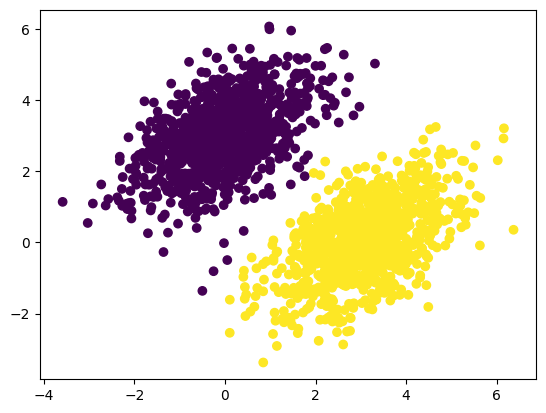

In [13]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

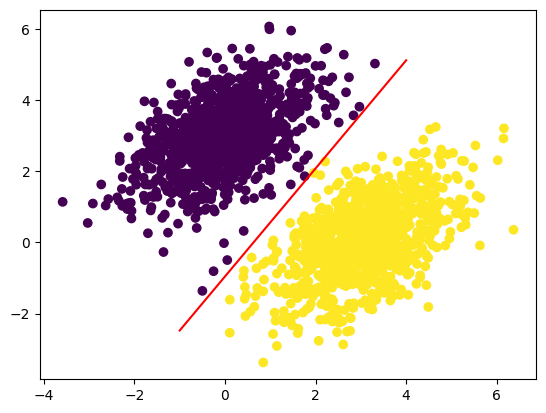

In [22]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)